In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 缺失值处理

In [2]:
movie = pd.read_csv("./data/IMDB-Movie-Data.csv")

In [3]:
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## 缺失值是nan

In [4]:
np.all(pd.notnull(movie))  # 里面如果有一个缺失值,那么会返回False,说明有缺失值

False

In [5]:
np.any(pd.isnull(movie))  # 里面如果有一个缺失值,那么会返回True,说明有缺失值

True

In [6]:
data = movie.dropna()

In [7]:
np.all(pd.notnull(data))  # 里面如果有一个缺失值,那么会返回False,说明有缺失值

True

In [8]:
movie["Revenue (Millions)"].mean()

82.95637614678898

In [9]:
movie["Revenue (Millions)"].fillna(movie["Revenue (Millions)"].mean(), inplace=True)

In [10]:
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [11]:
for i in movie.columns:
    if np.any(pd.isnull(movie[i])) == True:
        print(i)
        movie[i].fillna(movie[i].mean(), inplace=True)
        ##如果有一个列有nan，输出那一列的名字并且用那一列的均值把nan代替

Metascore


In [12]:
np.any(pd.isnull(movie))  # 里面如果有一个缺失值,那么会返回True,说明有缺失值

False

In [13]:
wis = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")

In [14]:
wis.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


## 缺失值是其他符号

In [15]:
wis = wis.replace(to_replace="?", value=np.nan)

In [16]:
wis.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [17]:
wis = wis.dropna()

In [18]:
np.any(pd.isnull(wis))  # 里面如果有一个缺失值,那么会返回True,说明有缺失值

False

# 数据离散化

In [19]:
data = pd.read_csv("./data/stock_day.csv")

In [20]:
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [21]:
p_change = data["p_change"]

In [22]:
p_change.head()

2018-02-27    2.68
2018-02-26    3.02
2018-02-23    2.42
2018-02-22    1.64
2018-02-14    2.05
Name: p_change, dtype: float64

In [23]:
# 自动分成差不多数量的类别
qcut = pd.qcut(p_change, 10)
qcut.value_counts()

(-10.030999999999999, -4.836]    65
(-0.462, 0.26]                   65
(0.26, 0.94]                     65
(5.27, 10.03]                    65
(-4.836, -2.444]                 64
(-2.444, -1.352]                 64
(-1.352, -0.462]                 64
(1.738, 2.938]                   64
(2.938, 5.27]                    64
(0.94, 1.738]                    63
Name: p_change, dtype: int64

In [24]:
# 指定分组区间
bins = [-100, -7, -5, -3, 0, 3, 5, 7, 100]
p_count = pd.cut(p_change, bins)

In [25]:
p_count.value_counts()

(0, 3]        215
(-3, 0]       188
(3, 5]         57
(-5, -3]       51
(5, 7]         35
(7, 100]       35
(-100, -7]     34
(-7, -5]       28
Name: p_change, dtype: int64

In [26]:
dummies = pd.get_dummies(p_count, prefix="rise")
dummies.head()

,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,0,0,0,0,1,0,0,0
2018-02-26,0,0,0,0,0,1,0,0
2018-02-23,0,0,0,0,1,0,0,0
2018-02-22,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,1,0,0,0


# 合并

In [27]:
pd.concat([data, dummies],axis=1)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,...,v_ma20,turnover,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,...,55576.11,2.39,0,0,0,0,1,0,0,0
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,...,56007.50,1.53,0,0,0,0,0,1,0,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,...,56372.85,1.32,0,0,0,0,1,0,0,0
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,...,60149.60,0.90,0,0,0,0,1,0,0,0
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,...,61716.11,0.58,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,...,115090.18,6.16,0,0,0,0,0,0,0,1
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,...,98904.79,3.19,0,0,0,0,1,0,0,0
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,...,100812.93,2.30,0,0,0,0,1,0,0,0
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,...,117681.67,4.76,0,0,0,0,1,0,0,0


In [28]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [29]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [30]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [31]:
pd.merge(left, right, on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [32]:
pd.merge(left, right, on=["key1", "key2"], how="inner")

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [33]:
pd.merge(left, right, on=["key1", "key2"], how="left")

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [34]:
pd.merge(left, right, on=["key1", "key2"], how="right")

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [35]:
pd.merge(left, right, on=["key1", "key2"], how="outer")

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


# 交叉表透视表

In [36]:
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [37]:
data.index

Index(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22', '2018-02-14',
       '2018-02-13', '2018-02-12', '2018-02-09', '2018-02-08', '2018-02-07',
       ...
       '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10', '2015-03-09',
       '2015-03-06', '2015-03-05', '2015-03-04', '2015-03-03', '2015-03-02'],
      dtype='object', length=643)

In [38]:
time = pd.to_datetime(data.index)

In [39]:
time.weekday

Int64Index([1, 0, 4, 3, 2, 1, 0, 4, 3, 2,
            ...
            4, 3, 2, 1, 0, 4, 3, 2, 1, 0],
           dtype='int64', length=643)

In [40]:
time.day

Int64Index([27, 26, 23, 22, 14, 13, 12,  9,  8,  7,
            ...
            13, 12, 11, 10,  9,  6,  5,  4,  3,  2],
           dtype='int64', length=643)

In [41]:
data["week"] = time.weekday

In [42]:
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2


In [43]:
data["p_n"] = np.where(data["p_change"] > 0, 1, 0)

In [44]:
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week,p_n
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0,1
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4,1
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3,1
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2,1


In [45]:
count = pd.crosstab(data["week"], data["p_n"])
count

p_n,0,1
week,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [46]:
sum = count.sum(axis=1).astype(np.float32)
sum

week
0    125.0
1    131.0
2    132.0
3    128.0
4    127.0
dtype: float32

In [47]:
ret = count.div(sum, axis=0)

In [48]:
ret

p_n,0,1
week,,
0,0.504000,0.496000
1,0.419847,0.580153
2,0.462121,0.537879
3,0.492188,0.507812
4,0.464567,0.535433


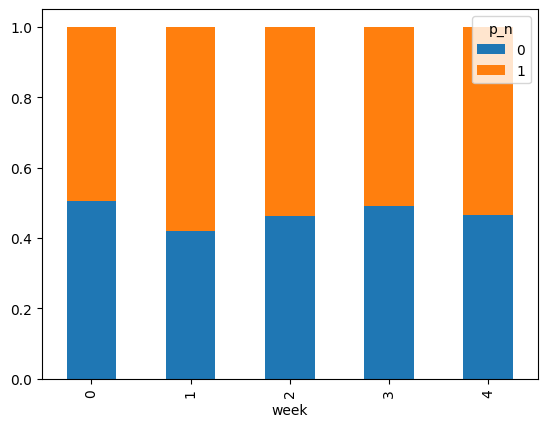

In [49]:
ret.plot(kind="bar", stacked=True)
plt.show()

In [50]:
data.pivot_table(["p_n"], index="week")

,p_n
week,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


# 分组聚合

In [51]:
col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})


In [52]:
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [53]:
col.groupby(["color"])["price1"].mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [54]:
col["price1"].groupby(col["color"]).mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [55]:
col.groupby(["color"], as_index=False)["price1"].mean()

,color,price1
0,green,2.025
1,red,2.380
2,white,5.560


In [56]:
starbucks = pd.read_csv("./data/starbucks/directory.csv")

In [57]:
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [58]:
count = starbucks.groupby(["Country"]).count()

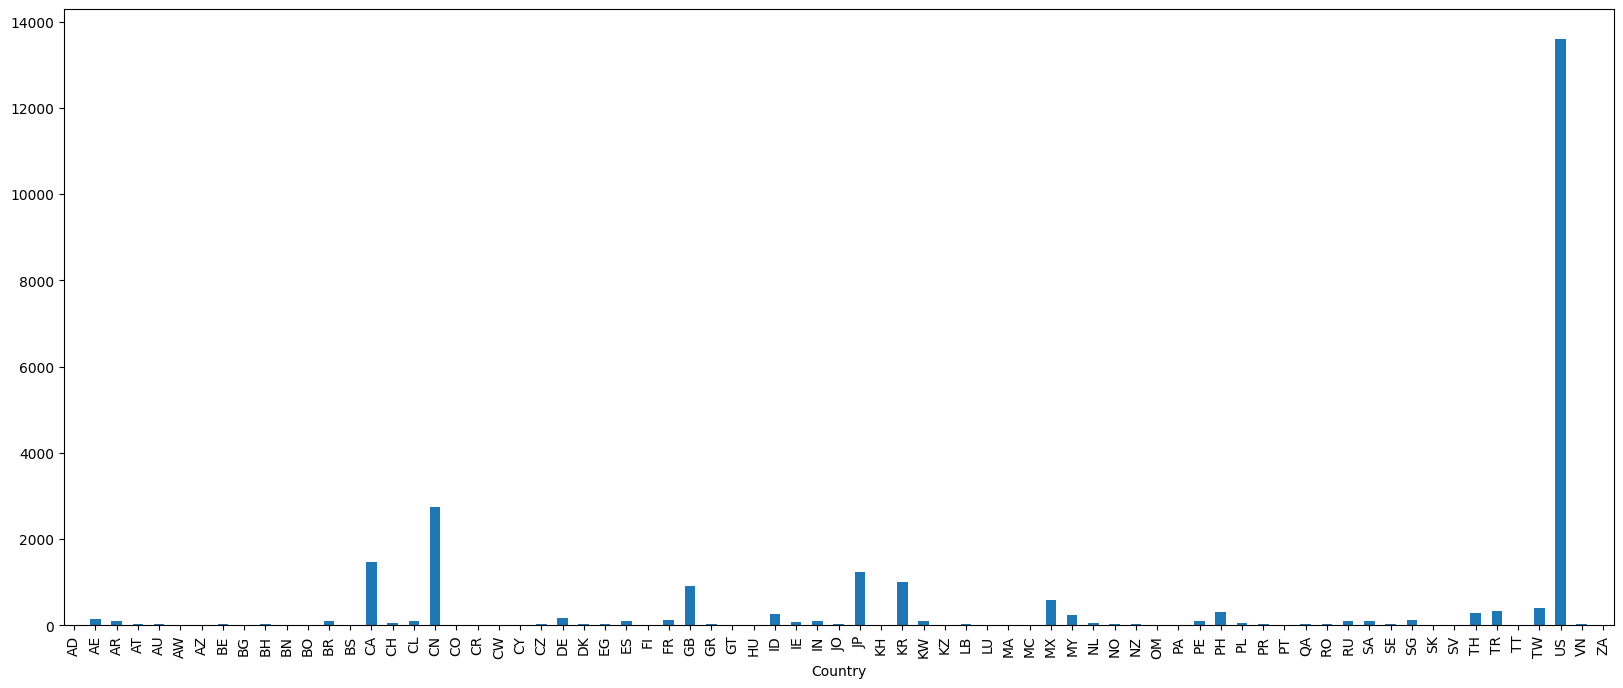

In [59]:
count["Brand"].plot(kind="bar", figsize=(20, 8))
plt.show()

In [60]:
starbucks.groupby(["Country", "State/Province"]).count()

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
...                       ...           ...         ...             ...   
US      WV                 25            25          25              25   
        WY                 23            23          23              23   
VN      HN                  6             6           6               6   
        SG                 19            19          19              19   
ZA      GT                  3             3           3               3   

                        Street Address  City  Postcode  Phone Number  \
Country State/Province                                                 
AD      7                            1     1         1             1   
AE      AJ                           2     2         0             0   
        AZ                          48    48         7            20   
        DU                          82    82        16            50   
        FU                           2     2         1             0   
...                                ...   ...       ...           ...   
US      WV                          25    25        25            23   
        WY                          23    23        23            22   
VN      HN                           6     6         6             6   
        SG                          19    19        19            17   
ZA      GT                           3     3         3             2   

                        Timezone  Longitude  Latitude  
Country State/Province                                 
AD      7                      1          1         1  
AE      AJ                     2          2         2  
        AZ                    48         48        48  
        DU                    82         82        82  
        FU                     2          2         2  
...                          ...        ...       ...  
US      WV                    25         25        25  
        WY                    23         23        23  
VN      HN                     6          6         6  
        SG                    19         19        19  
ZA      GT                     3          3         3  

[545 rows x 11 columns]